In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [3]:
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Download dataset via KaggleHub (NO manual download)
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

file_path = os.path.join(path, "IMDB Dataset.csv")
df = pd.read_csv(file_path)

# Convert label text to numeric
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})


# karena notebook aslinya punya df_train dan df_val,
# maka kita split IMDB menjadi train & val supaya step di bawah tetap sama
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42, stratify=df["sentiment"])


Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.


In [4]:
##DATA PREPROCESSING

In [5]:
df_train

,review,sentiment
47808,I caught this little gem totally by accident b...,1
20154,I can't believe that I let myself into this mo...,0
43069,*spoiler alert!* it just gets to me the nerve ...,0
19413,If there's one thing I've learnt from watching...,0
13673,"I remember when this was in theaters, reviews ...",0
...,...,...
31092,It's the 1920s. And a man named Walt Disney wa...,1
22917,"The first (and only) time I saw ""Shades"" was d...",0
47481,This was such a waste of time. Danger: If you ...,0
35597,this is by far the most pathetic movie Indian ...,0


In [6]:
df_val

,review,sentiment
18870,"Yes, MTV there really is a way to market Daria...",0
39791,The story of the bride fair is an amusing and ...,0
30381,"A team varied between Scully and Mulder, two o...",1
42294,This was a popular movie probably because of t...,0
33480,This movie made me so angry!! Here I am thinki...,0
...,...,...
3634,SILVER CITY (2+ outta 5 stars) As a huge fan o...,0
47910,Moscow Zero stole my money and I want it back!...,0
16086,This is the only film I've seen that is made b...,0
48294,"This is a story about Shin-ae, who moves to Mi...",1


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 47808 to 27491
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     40000 non-null  object
 1   sentiment  40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 937.5+ KB


In [8]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 18870 to 4478
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


In [9]:
df_train = df_train.rename(columns={'2401': 'ID', 'Borderlands': 'platform', 'Positive': 'sentimen', 'im getting on borderlands and i will murder you all ,': 'text'})
df_val = df_val.rename(columns={'3364': 'ID', 'Facebook': 'platform', 'Irrelevant': 'sentimen', 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣': 'text'})

In [10]:
df_train

,review,sentiment
47808,I caught this little gem totally by accident b...,1
20154,I can't believe that I let myself into this mo...,0
43069,*spoiler alert!* it just gets to me the nerve ...,0
19413,If there's one thing I've learnt from watching...,0
13673,"I remember when this was in theaters, reviews ...",0
...,...,...
31092,It's the 1920s. And a man named Walt Disney wa...,1
22917,"The first (and only) time I saw ""Shades"" was d...",0
47481,This was such a waste of time. Danger: If you ...,0
35597,this is by far the most pathetic movie Indian ...,0


In [11]:
print(df_train["sentiment"].value_counts())
print(df_val["sentiment"].value_counts())


sentiment
1    20000
0    20000
Name: count, dtype: int64
sentiment
0    5000
1    5000
Name: count, dtype: int64


In [12]:
print("sentiment Counts - Training")
print(df_train["sentiment"].value_counts())
print(20 * "-")
print("sentiment Counts - Validation")
print(df_val["sentiment"].value_counts())


sentiment Counts - Training
sentiment
1    20000
0    20000
Name: count, dtype: int64
--------------------
sentiment Counts - Validation
sentiment
0    5000
1    5000
Name: count, dtype: int64


In [13]:
print(df_train["sentiment"].value_counts())
print(df_val["sentiment"].value_counts())


sentiment
1    20000
0    20000
Name: count, dtype: int64
sentiment
0    5000
1    5000
Name: count, dtype: int64


In [14]:
print("sentiment Counts - Training")
print(df_train["sentiment"].value_counts())
print(20 * "-")
print("sentiment Counts - Validation")
print(df_val["sentiment"].value_counts())


sentiment Counts - Training
sentiment
1    20000
0    20000
Name: count, dtype: int64
--------------------
sentiment Counts - Validation
sentiment
0    5000
1    5000
Name: count, dtype: int64


In [15]:
print(f"Rows: {df_train.shape[0]}, Columns: {df_train.shape[1]}")
print(f"Duplicates: {df_train.duplicated().sum()}")
print(f"missing data: {sum(df_train.isna().sum())}")

print(20*"==")

print(f"Rows: {df_val.shape[0]}, Columns: {df_val.shape[1]}")
print(f"Duplicates: {df_val.duplicated().sum()}")
print(f"missing data: {sum(df_val.isna().sum())}")

Rows: 40000, Columns: 2
Duplicates: 272
missing data: 0
Rows: 10000, Columns: 2
Duplicates: 13
missing data: 0


In [16]:
# Bersihkan data pada df_train
for col in df_train.columns:
    df_train = df_train[df_train[col] != '?']
    df_train = df_train[df_train[col] != '']
    df_train = df_train[~df_train[col].isna()]

df_train.drop_duplicates(keep='first', inplace=True)
df_train.info()

# Bersihkan data pada df_val
for col in df_val.columns:
    df_val = df_val[df_val[col] != '?']
    df_val = df_val[df_val[col] != '']
    df_val = df_val[~df_val[col].isna()]

df_val.drop_duplicates(keep='first', inplace=True)
df_val.info()

# Statistik hasil pembersihan
print(f"Rows: {df_train.shape[0]}, Columns: {df_train.shape[1]}")
print(f"Duplicates: {df_train.duplicated().sum()}")
print(f"Missing data: {df_train.isna().sum().sum()}")

print("=" * 40)

print(f"Rows: {df_val.shape[0]}, Columns: {df_val.shape[1]}")
print(f"Duplicates: {df_val.duplicated().sum()}")
print(f"Missing data: {df_val.isna().sum().sum()}")


<class 'pandas.core.frame.DataFrame'>
Index: 39728 entries, 47808 to 27491
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     39728 non-null  object
 1   sentiment  39728 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 931.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 9987 entries, 18870 to 4478
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     9987 non-null   object
 1   sentiment  9987 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 234.1+ KB
Rows: 39728, Columns: 2
Duplicates: 0
Missing data: 0
Rows: 9987, Columns: 2
Duplicates: 0
Missing data: 0


In [17]:
pip install emoji


In [18]:
import re
import string
import emoji
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# Pastikan resource NLTK terunduh
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')           # kalau belum pernah diunduh
nltk.download('omw-1.4')           # opsional tapi sering diperlukan
nltk.download('punkt')             # untuk tokenisasi, jika kamu pakai word_tokenize()

# Inisialisasi
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Kamus singkatan umum (bisa diperluas)
abbreviation_map = {
    "u": "you",
    "ur": "your",
    "r": "are",
    "btw": "by the way",
    "idk": "i do not know",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "lol": "laughing out loud",
    "omg": "oh my god",
    "thx": "thanks",
    "pls": "please",
    "plz": "please",
    "dont": "do not",
    "cant": "cannot",
    "wont": "will not",
    "ive": "i have",
    "ill": "i will",
    "didnt": "did not",
    "doesnt": "does not",
    "isnt": "is not",
    "wasnt": "was not",
    "havent": "have not",
    "shouldnt": "should not",
    "couldnt": "could not",
    "wouldnt": "would not",
}

def get_wordnet_pos(word):
    """
    Helper function:
    Mengubah POS tag (part-of-speech) menjadi format yang bisa dipakai lemmatizer.
    """
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)


def preprocess_text(text):
    """
    Function for text preprocessing for English sentiment analysis.
    Includes:
      - lowercase
      - emoji handling
      - URL and number removal
      - punctuation removal
      - short form expansion
      - stopword removal
      - lemmatization
    """

    # Ensure input is string
    if not isinstance(text, str):
        text = str(text)

    # Lowercase
    text = text.lower()

    # Replace emojis with text description
    text = emoji.demojize(text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Expand common short forms
    words = text.split()
    expanded_words = [abbreviation_map.get(w, w) for w in words]
    text = ' '.join(expanded_words)

    # Tokenize and remove stopwords + lemmatize
    filtered_words = []
    for word in text.split():
        if word not in stop_words:
            pos = get_wordnet_pos(word)
            lemma = lemmatizer.lemmatize(word, pos)
            filtered_words.append(lemma)

    # Join cleaned text
    processed_text = ' '.join(filtered_words)

    # Clean extra whitespace
    processed_text = re.sub(r'\s+', ' ', processed_text).strip()

    return processed_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
df_train['clean_text'] = df_train['review'].apply(preprocess_text)
print(df_train[['review', 'clean_text']])


                                                  review  \
47808  I caught this little gem totally by accident b...   
20154  I can't believe that I let myself into this mo...   
43069  *spoiler alert!* it just gets to me the nerve ...   
19413  If there's one thing I've learnt from watching...   
13673  I remember when this was in theaters, reviews ...   
...                                                  ...   
31092  It's the 1920s. And a man named Walt Disney wa...   
22917  The first (and only) time I saw "Shades" was d...   
47481  This was such a waste of time. Danger: If you ...   
35597  this is by far the most pathetic movie Indian ...   
27491  This movie forever left an impression on me. I...   

                                              clean_text  
47808  caught little gem totally accident back reviva...  
20154  cannot believe let movie accomplish favor frie...  
43069  spoiler alert get nerve people remake use term...  
19413  there one thing learnt watch george 

In [20]:
df_train

,review,sentiment,clean_text
47808,I caught this little gem totally by accident b...,1,caught little gem totally accident back reviva...
20154,I can't believe that I let myself into this mo...,0,cannot believe let movie accomplish favor frie...
43069,*spoiler alert!* it just gets to me the nerve ...,0,spoiler alert get nerve people remake use term...
19413,If there's one thing I've learnt from watching...,0,there one thing learnt watch george romeros cr...
13673,"I remember when this was in theaters, reviews ...",0,remember theater review say horrible well thin...
...,...,...,...
31092,It's the 1920s. And a man named Walt Disney wa...,1,man name walt disney mission satisfy family ch...
22917,"The first (and only) time I saw ""Shades"" was d...",0,first time saw shade sneakpreview hadnt even p...
47481,This was such a waste of time. Danger: If you ...,0,waste time danger watch tempt tear dvd wall he...
35597,this is by far the most pathetic movie Indian ...,0,far pathetic movie indian cinema cinema come w...


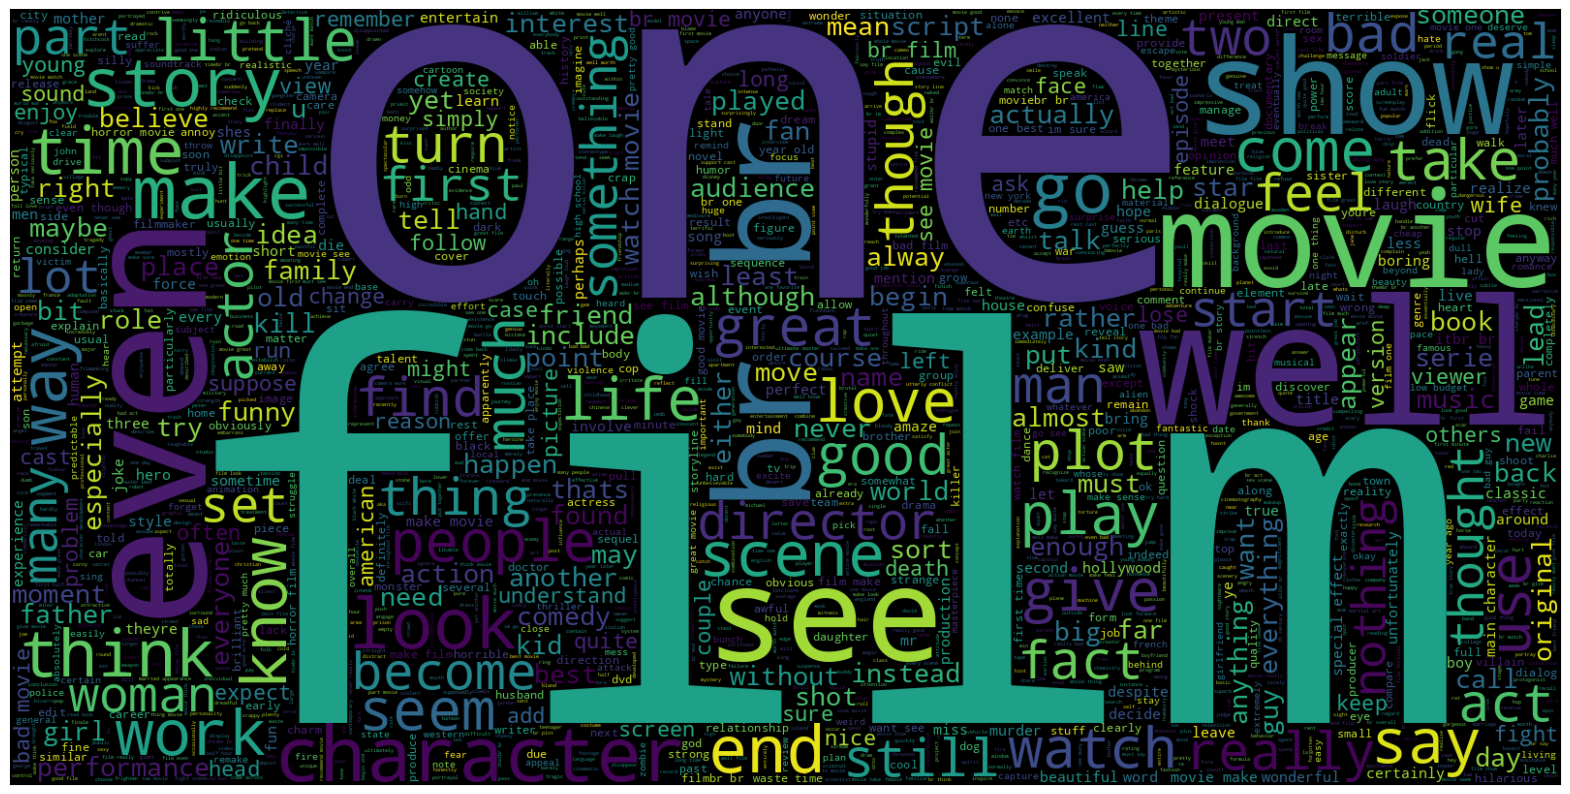

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(df_train['clean_text']))
plt.imshow(wc, interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.show()

In [22]:
df_train['clean_text'] = df_train['review'].apply(preprocess_text)
print(df_train[['review', 'clean_text']])

                                                  review  \
47808  I caught this little gem totally by accident b...   
20154  I can't believe that I let myself into this mo...   
43069  *spoiler alert!* it just gets to me the nerve ...   
19413  If there's one thing I've learnt from watching...   
13673  I remember when this was in theaters, reviews ...   
...                                                  ...   
31092  It's the 1920s. And a man named Walt Disney wa...   
22917  The first (and only) time I saw "Shades" was d...   
47481  This was such a waste of time. Danger: If you ...   
35597  this is by far the most pathetic movie Indian ...   
27491  This movie forever left an impression on me. I...   

                                              clean_text  
47808  caught little gem totally accident back reviva...  
20154  cannot believe let movie accomplish favor frie...  
43069  spoiler alert get nerve people remake use term...  
19413  there one thing learnt watch george 

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

tfidf = TfidfVectorizer(max_features=1700, ngram_range=(1,2))

In [24]:
# PREPROCESS: ubah kolom "review" jadi "clean_text"
df_train["clean_text"] = df_train["review"].apply(preprocess_text)
df_val["clean_text"] = df_val["review"].apply(preprocess_text)


In [25]:
X_train = tfidf.fit_transform(df_train["clean_text"])
X_test = tfidf.transform(df_val["clean_text"])

y_train = df_train["sentiment"]
y_test = df_val["sentiment"]

In [26]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, f1_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, X_test, y_test, model_name="Model"):

    y_pred = model.predict(X_test)

    # Score for roc curve
    if hasattr(model, "decision_function"):
        decision_scores = model.decision_function(X_test)
    else:
        decision_scores = model.predict_proba(X_test)

    # Binarize label
    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes)
    n_classes = y_test_bin.shape[1]

    print(f"\n======= Evaluasi Klasifikasi {model_name} =======")
    print(f"Akurasi      : {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(f"F1-score     : {f1_score(y_test, y_pred, average='macro'):.3f}")

    # ============= BINARY CASE (IMDB) =============
    if n_classes == 1:
        # Untuk binary, decision_scores bisa 1 kolom, ambil untuk kelas positif
        if decision_scores.ndim > 1:
            decision_scores = decision_scores[:, 1]

        fpr, tpr, _ = roc_curve(y_test, decision_scores)
        auc_score = auc(fpr, tpr)
        print(f"AUC ROC      : {auc_score:.3f}")
        print("===============================================")

        # Plot ROC
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, lw=2, label=f"AUC = {auc_score:.3f}")
        plt.plot([0,1], [0,1], "k--")
        plt.title(f"ROC Curve - {model_name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.grid(True)
        plt.show()

        return

    # ============= MULTICLASS CASE (contoh dataset Twitter) =============
    fpr = {}
    tpr = {}
    auc_score = {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], decision_scores[:, i])
        auc_score[i] = auc(fpr[i], tpr[i])

    macro_auc = roc_auc_score(y_test_bin, decision_scores, average="macro", multi_class="ovr")
    print(f"AUC Macro    : {macro_auc:.3f}")
    print("===============================================")


In [27]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.8744367677981376
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4992
           1       0.87      0.88      0.88      4995

    accuracy                           0.87      9987
   macro avg       0.87      0.87      0.87      9987
weighted avg       0.87      0.87      0.87      9987



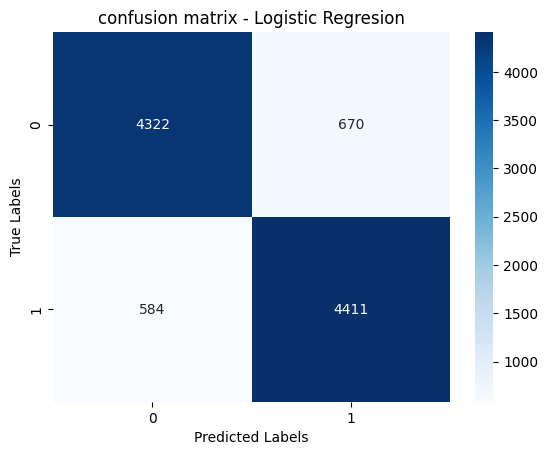

In [28]:
y_predir = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_predir))
print("Classification Report:\n", classification_report(y_test, y_predir))

cm = confusion_matrix(y_test, y_predir)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('confusion matrix - Logistic Regresion')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder

# Encode label SEKALI SAJA
le = LabelEncoder()
df_train["sentiment_enc"] = le.fit_transform(df_train["sentiment"])
df_val["sentiment_enc"] = le.transform(df_val["sentiment"])

# Pakai yang encoded sebagai target
y_train = df_train["sentiment_enc"]
y_test = df_val["sentiment_enc"]



======= Evaluasi Klasifikasi Logistic Regression =======
Akurasi      : 87.44%
F1-score     : 0.874
AUC ROC      : 0.948


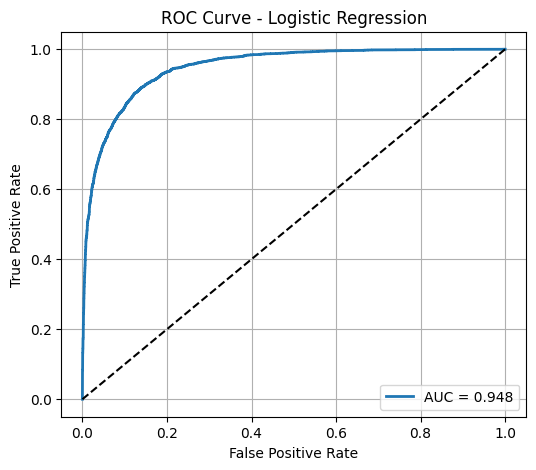

In [30]:
lr_results = evaluate_model(model, X_test, y_test, model_name="Logistic Regression")